In [1]:
import requests, json

In [2]:
import requests 
import pandas as pd 
import datetime

In [3]:
api_key = "bd4debe75858698ff9a9c54d7f4d4eab"

In [4]:
lat = 18.184135
lon = 74.610764

In [5]:
api_url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"

In [6]:
response = requests.get(api_url)
weather_data = response.json()
weather_data.keys()
len(weather_data['list'])
weather_data['list'][0]['weather'][0]['description']

'clear sky'

In [7]:
temperatures = [item['main']['temp'] for item in weather_data['list']] 

In [8]:
timestamps = [pd.to_datetime(item['dt'], unit='s') for item in weather_data['list']]
temperature = [item['main']['temp'] for item in weather_data['list']]
humidity = [item['main']['humidity'] for item in weather_data['list']]      #retriving humidity data & putting it into list
wind_speed = [item['wind']['speed'] for item in weather_data['list']]
weather_description = [item['weather'][0]['description'] for item in weather_data['list']]

In [9]:
weather_df = pd.DataFrame({'Timestamp': timestamps, 
                           'Temperature': temperatures,                #creating dataframe
                           'humidity': humidity, 
                           'wind_speed':wind_speed,
                           'weather_description': weather_description})

In [10]:
weather_df.set_index('Timestamp', inplace=True)                   #set index
max_temp = weather_df['Temperature'].max()
print(f"Maximum Temperature - {max_temp}")
min_temp = weather_df['Temperature'].min()
print(f"Minimum Temperature - {min_temp}")

Maximum Temperature - 304.66
Minimum Temperature - 291.66


In [11]:
weather_df.fillna(0, inplace=True)           #replacing missing values

In [12]:
weather_df['Temperature'] = weather_df['Temperature'].apply(lambda x: x - 273.15 if isinstance(x, float)else x)

In [13]:
print(weather_df)

                     Temperature  humidity  wind_speed weather_description
Timestamp                                                                 
2024-11-10 06:00:00        28.44        37        2.70           clear sky
2024-11-10 09:00:00        29.02        34        1.11           clear sky
2024-11-10 12:00:00        28.71        35        2.31           clear sky
2024-11-10 15:00:00        24.90        42        3.40           clear sky
2024-11-10 18:00:00        23.00        48        2.42           clear sky
2024-11-10 21:00:00        20.70        56        1.17           clear sky
2024-11-11 00:00:00        19.65        56        1.74           clear sky
2024-11-11 03:00:00        23.51        45        1.70           clear sky
2024-11-11 06:00:00        28.68        31        4.48           clear sky
2024-11-11 09:00:00        30.79        25        4.37    scattered clouds
2024-11-11 12:00:00        28.37        31        4.35    scattered clouds
2024-11-11 15:00:00      

In [14]:
import matplotlib.pyplot as plt
daily_mean_temp = weather_df['Temperature'].resample('D').mean()
daily_mean_humidity = weather_df['humidity'].resample('D').mean()
daily_mean_wind_speed = weather_df['wind_speed'].resample('D').mean()

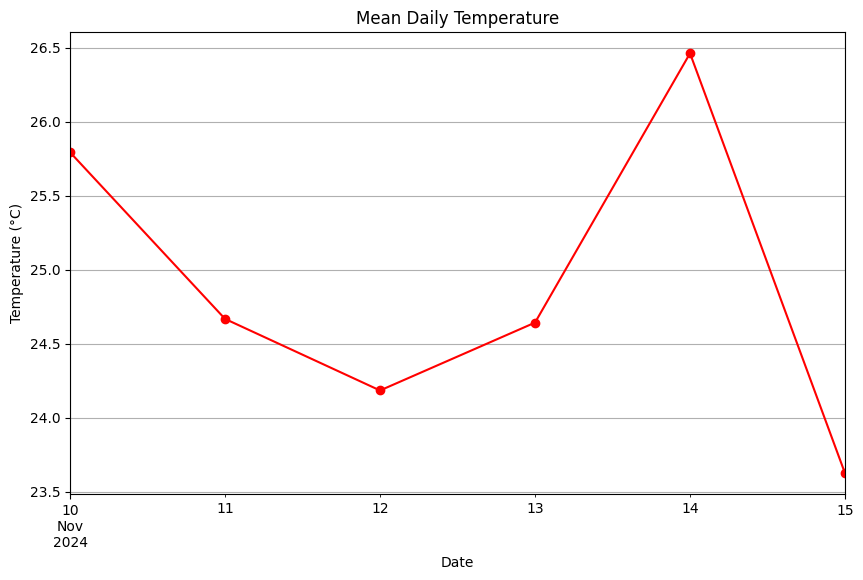

In [15]:
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color='red', linestyle='-', marker='o')                    #line plot
plt.title('Mean Daily Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

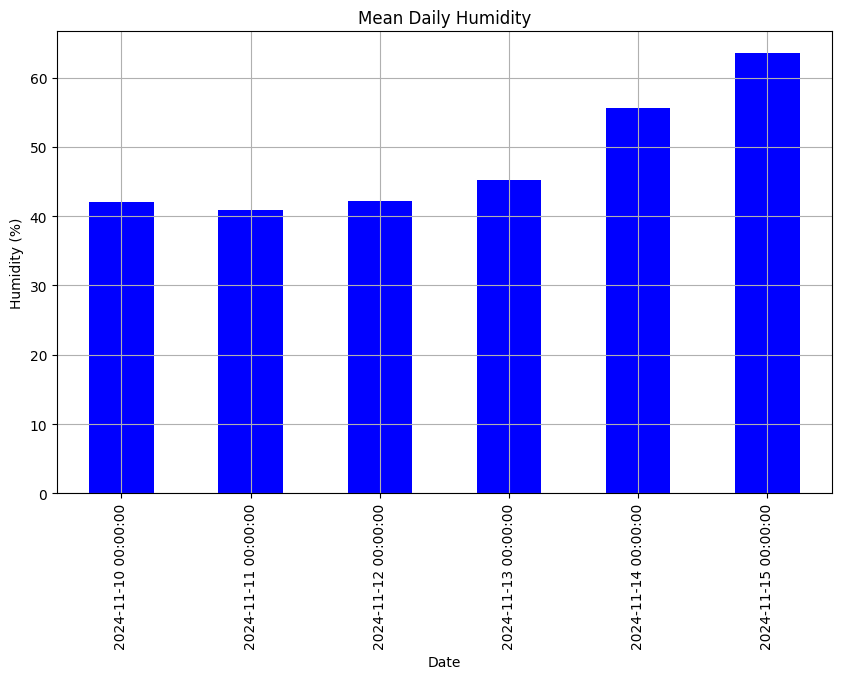

In [16]:
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind='bar', color='blue')
plt.title('Mean Daily Humidity')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.show()

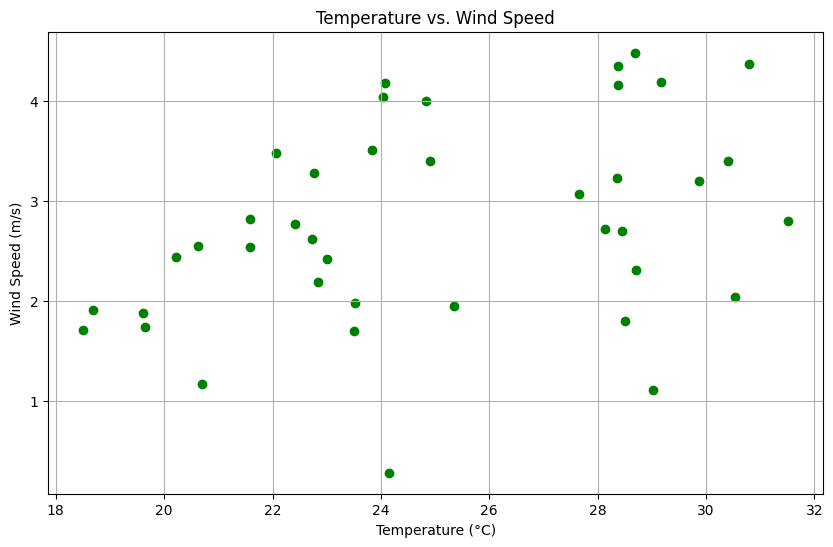

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(weather_df['Temperature'], weather_df['wind_speed'], color='green')
plt.title('Temperature vs. Wind Speed')
plt.xlabel('Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

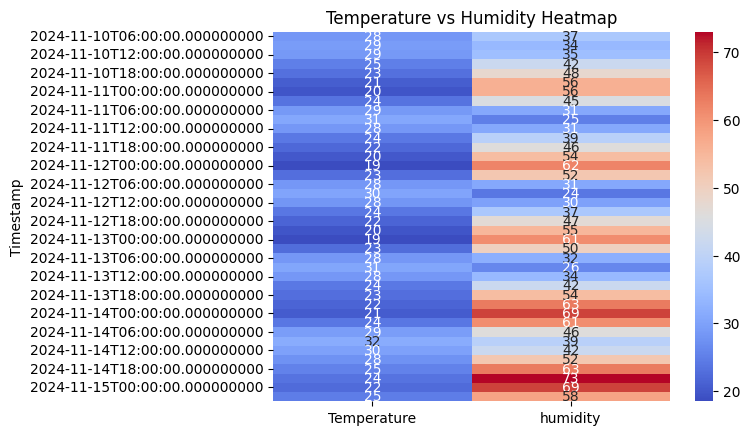

In [18]:
import seaborn as sns
heatmap_data = weather_df[['Temperature', 'humidity']]
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Temperature vs Humidity Heatmap')
plt.show()

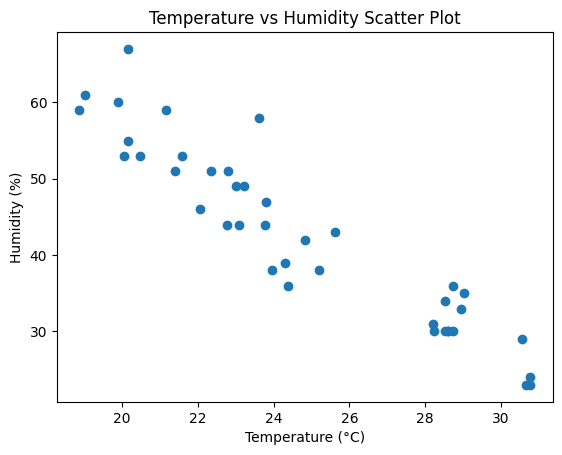

In [19]:
plt.scatter(weather_df['Temperature'], weather_df['humidity'])
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity Scatter Plot')
plt.show()

# 